In [106]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [107]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1], [1,1], [0,0]] # 5 different classes in this case
X,y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std = 0.4)

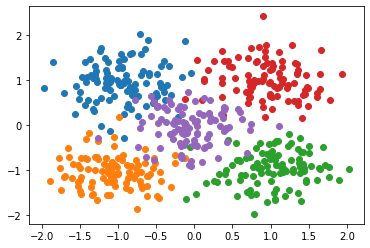

In [109]:
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.scatter(X[y==3, 0], X[y==3,1])
plt.scatter(X[y==4, 0], X[y==4,1])

In [111]:
# hot encoding
y_cat = to_categorical(y,5) # second argument is the number of classes
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [114]:
model = Sequential()
model.add(Dense(units=5,input_shape=(2,), activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [115]:
model.fit(x=X, y=y_cat, verbose = 1, batch_size=50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.5124 - accuracy: 0.4400
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.8120
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.8780
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.9340
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.9520
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.9460
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9480
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9520
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9440
Epoch 11/

In [116]:
def plot_decision_boundary(X,y,model):
  x_span = np.linspace(min(X[:,0]) -1 ,max(X[:,0]) + 1)
  y_span = np.linspace(min(X[:,1]) -1 ,max(X[:,1]) + 1)
  xx, yy = np.meshgrid(x_span,y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred_func = np.argmax(model.predict(grid), axis=-1)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx,yy,z)

79/79 [==============================] - 0s 1ms/step


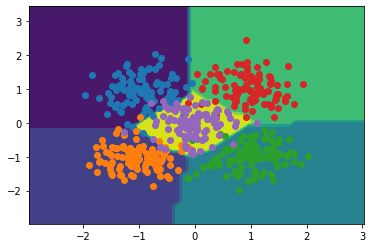

In [117]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.scatter(X[y==3, 0], X[y==3,1])
plt.scatter(X[y==4, 0], X[y==4,1])

1/1 [==============================] - 0s 18ms/step
Prediction is [2]


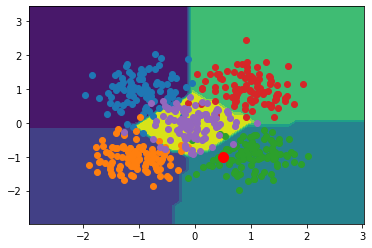

In [118]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.scatter(X[y==3, 0], X[y==3,1])
plt.scatter(X[y==4, 0], X[y==4,1])
x = 0.5
y = -1
point = np.array([[x, y]])
prediction =  pred_func = np.argmax(model.predict(point), axis=-1)
plt.plot([x],[y], marker = 'o', markersize=10, color ='r')
print("Prediction is", prediction)